In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
np.random.seed(101)
X = np.random.uniform(-3, 3, size = 100).reshape(-1,1)
y = 0.5 * pow(X,3) - pow(X,2) + 2 + np.random.normal(0, 1, size=X.shape)

In [3]:
X.shape, y.shape

((100, 1), (100, 1))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)

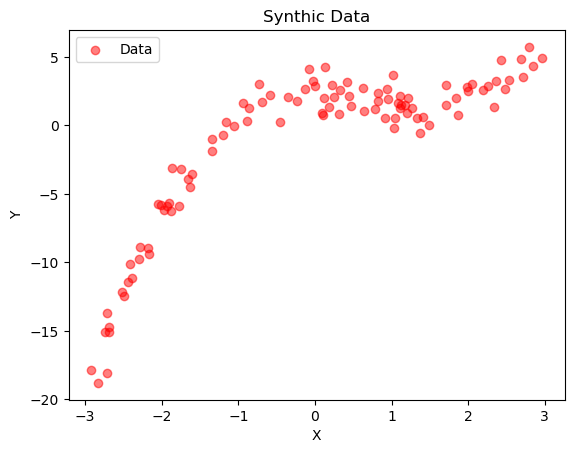

In [5]:
plt.scatter(X, y, color = 'red', alpha = 0.5, label = 'Data')
plt.title('Synthic Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

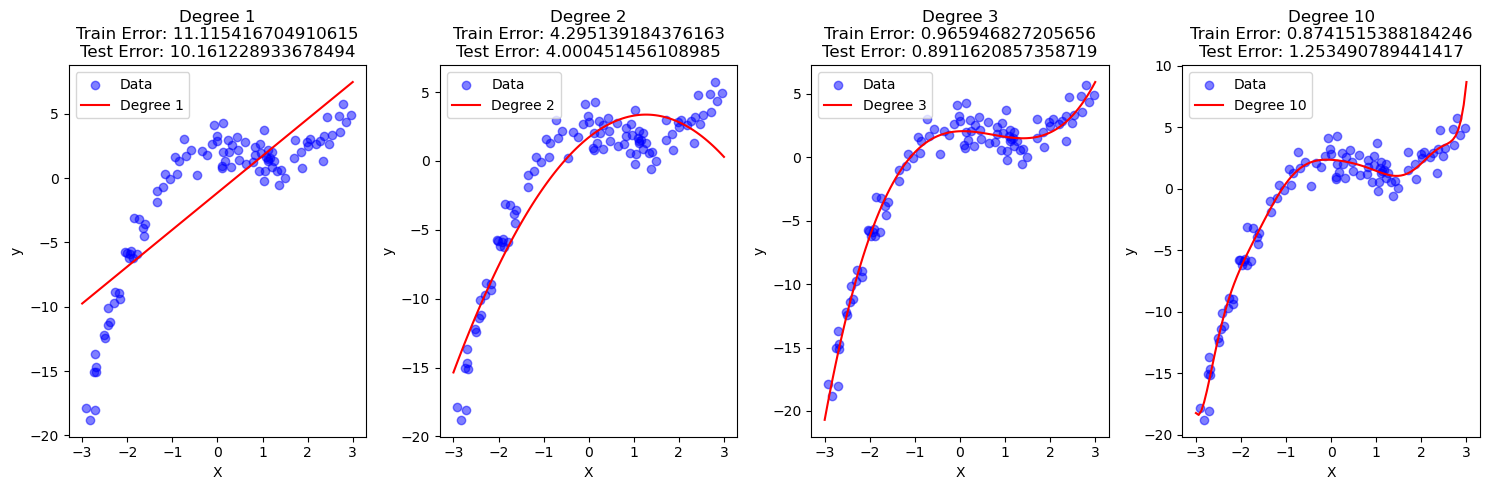

In [18]:
degrees = [1,2,3,10]
train_error = []
test_error = []

plt.figure(figsize=(15,5))

for i, degree in enumerate(degrees):
    # Training the model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    # Prediction on the trained data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Error
    train_error.append(mean_squared_error(y_train,y_train_pred))  
    test_error.append(mean_squared_error(y_test,y_test_pred))

    df = pd.DataFrame(train_error, columns = ['train_error'])
    df = pd.DataFrame(test_error, columns = ['test_error'])

    # Plot the results
    plt.subplot(1, len(degrees), i + 1)
    plt.scatter(X, y, color='blue', alpha=0.5, label='Data')
    X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot, color='red', label=f'Degree {degree}')
    plt.title(f'Degree {degree}\nTrain Error: {train_error[i]:}\nTest Error: {test_error[i]:}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()

In [46]:
for i, degree in enumerate(degrees):
    print("Train Error for Degree {}: {}".format(degrees[0 + i],train_error[i]))
    print("Test Error for Degree {}: {}".format(degrees[0 + i],test_error[i]),"\n")

Train Error for Degree 1: 11.115416704910615
Test Error for Degree 1: 10.161228933678494 

Train Error for Degree 2: 4.295139184376163
Test Error for Degree 2: 4.000451456108985 

Train Error for Degree 3: 0.965946827205656
Test Error for Degree 3: 0.8911620857358719 

Train Error for Degree 10: 0.8741515388184246
Test Error for Degree 10: 1.253490789441417 



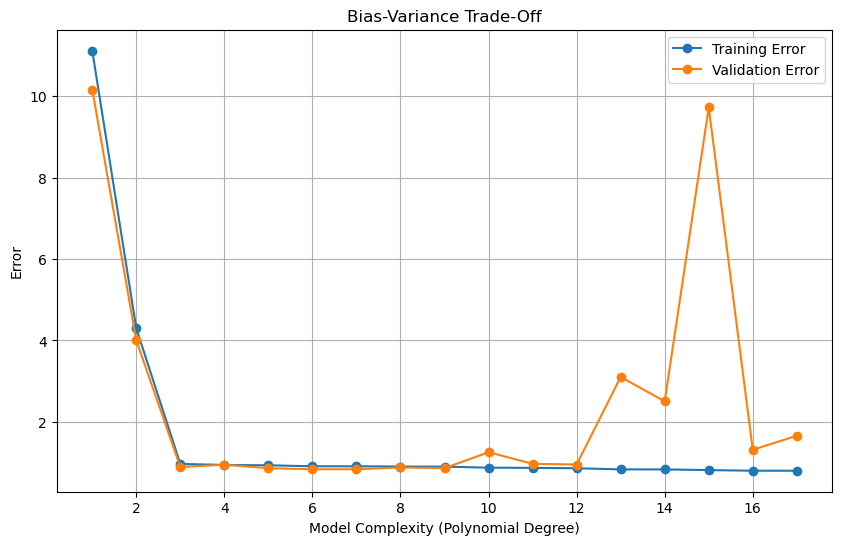

In [48]:
train_errors = []
test_errors = []
degrees = range(1, 18)

for degree in degrees:
    # Training the model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    # Error
    train_errors.append(mean_squared_error(y_train,model.predict(X_train)))
    test_errors.append(mean_squared_error(y_test,model.predict(X_test)))

# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error', marker='o')
plt.plot(degrees, test_errors, label='Validation Error', marker='o')
plt.title('Bias-Variance Trade-Off')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
z = len(degrees)
for i in range(z):
    print("Train Error for Degree {}: {}".format(i,train_errors[i]))
    print("Test Error for Degree {}: {}".format(i,test_errors[i]),"\n")

Train Error for Degree 0: 11.115416704910615
Test Error for Degree 0: 10.161228933678494 

Train Error for Degree 1: 4.295139184376163
Test Error for Degree 1: 4.000451456108985 

Train Error for Degree 2: 0.965946827205656
Test Error for Degree 2: 0.8911620857358719 

Train Error for Degree 3: 0.9406484244692989
Test Error for Degree 3: 0.9468175076641383 

Train Error for Degree 4: 0.9325530104692346
Test Error for Degree 4: 0.8605081360360481 

Train Error for Degree 5: 0.9074815452036393
Test Error for Degree 5: 0.8353581853335255 

Train Error for Degree 6: 0.9074809110594202
Test Error for Degree 6: 0.835409895864722 

Train Error for Degree 7: 0.9019789501987621
Test Error for Degree 7: 0.8788368631375987 

Train Error for Degree 8: 0.8991075663346498
Test Error for Degree 8: 0.8616360012325348 

Train Error for Degree 9: 0.8741515388184246
Test Error for Degree 9: 1.253490789441417 

Train Error for Degree 10: 0.8688026243065134
Test Error for Degree 10: 0.9687839842307862 

Tr